In [140]:
import numpy as np 
import plotly.graph_objects as go
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from decimal import Decimal
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/exploring-wealth-forbes-richest-people-dataset/forbes_richman.csv


In [141]:
df = pd.read_csv('/kaggle/input/exploring-wealth-forbes-richest-people-dataset/forbes_richman.csv',encoding='ISO-8859-1')
df.shape

(2632, 7)

In [142]:
df = df.rename(columns={'Net Worth': 'NetWorth'})
df.NetWorth = df.NetWorth.str.replace(r'[^0-9]', '')
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,Rank,Name,NetWorth,Age,Country,Source,Industry
0,1.0,Elon Musk,219,50.0,United States,"Tesla, SpaceX",Automotive
1,2.0,Jeff Bezos,171,58.0,United States,Amazon,Technology
2,3.0,Bernard Arnault & family,158,73.0,France,LVMH,Fashion & Retail
3,4.0,Bill Gates,129,66.0,United States,Microsoft,Technology
4,5.0,Warren Buffett,118,91.0,United States,Berkshire Hathaway,Finance & Investments


In [143]:
df = df.dropna()
df.NetWorth = df.NetWorth.astype(int)
df.Age = df.Age.astype(int)
TotWealth = df.NetWorth.sum()
df['ForbesWealth(%)'] = (df.NetWorth / TotWealth) * 100
df.set_index('Rank', inplace = True)
df.head()

,Name,NetWorth,Age,Country,Source,Industry,ForbesWealth(%)
Rank,,,,,,,
1.0,Elon Musk,219,50,United States,"Tesla, SpaceX",Automotive,0.230784
2.0,Jeff Bezos,171,58,United States,Amazon,Technology,0.180201
3.0,Bernard Arnault & family,158,73,France,LVMH,Fashion & Retail,0.166502
4.0,Bill Gates,129,66,United States,Microsoft,Technology,0.135941
5.0,Warren Buffett,118,91,United States,Berkshire Hathaway,Finance & Investments,0.124349


In [159]:
industry_df = pd.DataFrame(df.groupby('Industry').NetWorth.sum())
industry_df['% Total Wealth'] = (industry_df.NetWorth / TotWealth) * 100
industry_df = industry_df.reset_index()
industry_df.loc[industry_df['% Total Wealth'] < 3.0, 'Industry'] = 'Other'
industry_df = industry_df.groupby('Industry').sum().reset_index()

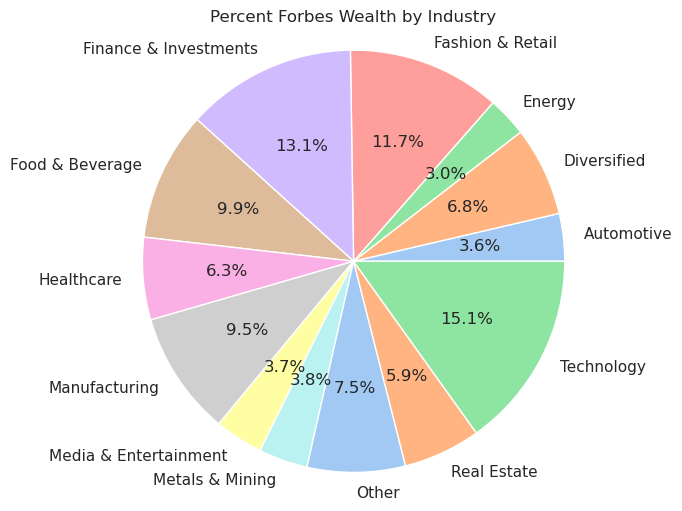

In [165]:
plt.figure(figsize=(6,6))
plt.pie(industry_df['% Total Wealth'], labels= industry_df.Industry, colors=sns.color_palette('pastel'), autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percent Forbes Wealth by Industry')
plt.show()

In [145]:
country_df = pd.DataFrame(df.groupby('Country').NetWorth.sum())
country_df['% Total Wealth'] = (country_df.NetWorth / TotWealth) * 100
country_df = country_df.reset_index()
country_df

,Country,NetWorth,% Total Wealth
0,Algeria,51,0.053744
1,Argentina,101,0.106435
2,Australia,1915,2.018041
3,Austria,518,0.545872
4,Barbados,17,0.017915
...,...,...,...
69,United Kingdom,1470,1.549097
70,United States,30625,32.272852
71,Uruguay,30,0.031614
72,Venezuela,35,0.036883


In [162]:
fig = go.Figure(data=go.Choropleth(
    locations = country_df['Country'],
    locationmode = 'country names',
    z = country_df['% Total Wealth'],
    text = country_df['Country'],
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = 'Wealth of Individuals',
))

fig.update_layout(
    title_text='Forbes NetWorth By Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [147]:
#dummy = pd.get_dummies(df.Industry)
#df = pd.concat([df.drop('Industry', axis=1), dummy], axis=1)
#dummy = pd.get_dummies(df.Country)
#df = pd.concat([df.drop('Country', axis = 1), dummy] , axis=1)
#df.head()